In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/PT_Project_Otsu
%ls

/content/drive/My Drive/PT_Project_Otsu
cameraman.tif  org.jpg  sudoku-original.jpg  trace.txt


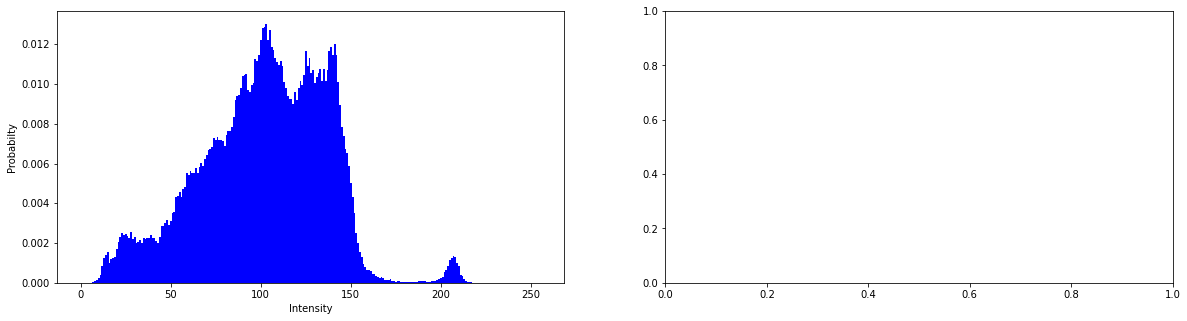

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


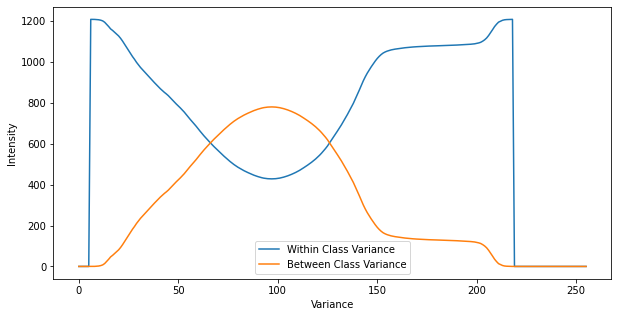

optimal threshold 97


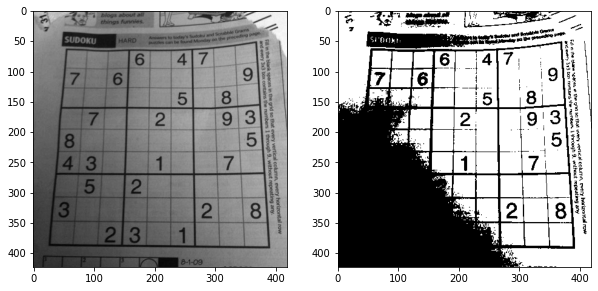

In [7]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


def Hist(img):
    row, col = img.shape 
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            y[img[i,j]] += 1
    cnt=countPixel(y)
    y=y/cnt
    x = np.arange(0,256)
    f, axarr = plt.subplots(1,2,figsize=(20,5))
    axarr[0].bar(x, y, color='b', width=1, align='center')
    axarr[0].set_ylabel("Probabilty")
    axarr[0].set_xlabel("Intensity")
    plt.show()
    return y


def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y


   
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def weight(h,s, e):
    w = float(0)
    # print(s,e)
    for i in range(s, e):
        w += h[i]
    return w


def mean(h,s, e):
    m = float(0)
    w = weight(h,s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/w 


def variance(h,s, e):
    v = float(0)
    m = mean(h,s, e)
    w = weight(h,s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v
            

def threshold(h):
    threshold_values = {}
    vwc_values=np.zeros((256,))
    vbc_values=np.zeros((256,))
    for i in range(1, len(h)):
        vb = variance(h,0, i)
        wb = weight(h,0, i)
        mb = mean(h,0, i)
        vf = variance(h,i, len(h))
        wf = weight(h,i, len(h)) 
        mf = mean(h,i, len(h))
        vwc = wb * (vb) + wf * (vf)
        vbc = wb * wf * (mb - mf)**2


        if not math.isnan(vwc):
            threshold_values[i] = vwc
            vwc_values[i]=vwc

        if not math.isnan(vbc):
            vbc_values[i]=vbc
        
    x = np.arange(0,256)
    plt.figure(figsize=(10,5))
    plt.plot(x, vwc_values,label="Within Class Variance")
    plt.plot(x, vbc_values,label="Between Class Variance")
    plt.xlabel("Variance")
    plt.ylabel("Intensity")
    plt.legend()
    plt.show()
    return threshold_values


def get_optimal_threshold(threshold_values):
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]


def Otsu_Threshold(img):
    img = np.asarray(img)
    h = Hist(img)
    threshold_values =threshold(h)
    op_thres = get_optimal_threshold(threshold_values)
    res = regenerate_img(img, op_thres)
    return res

image = Image.open('sudoku-original.jpg').convert("L")
res=Otsu_Threshold(image)
f, axarr = plt.subplots(1,2,figsize=(10,10))
axarr[0].imshow(image,cmap="gray")
axarr[1].imshow(res,cmap="gray")

(423, 419)


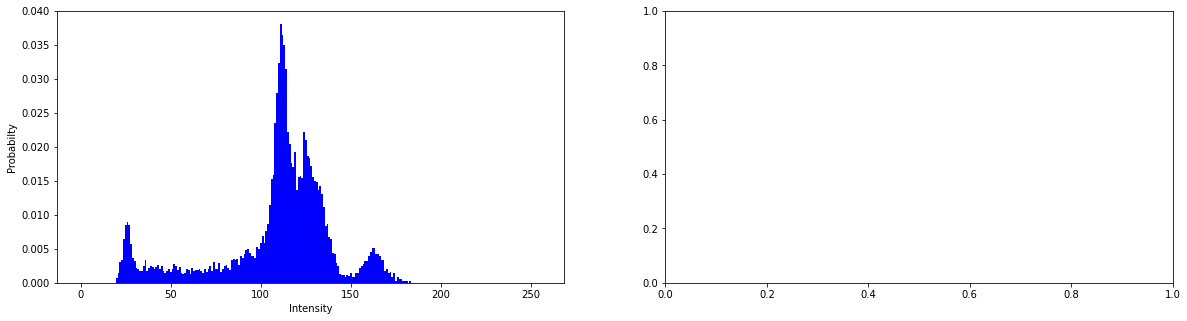

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


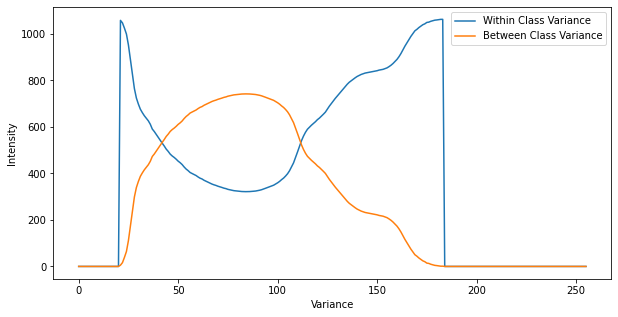

optimal threshold 84


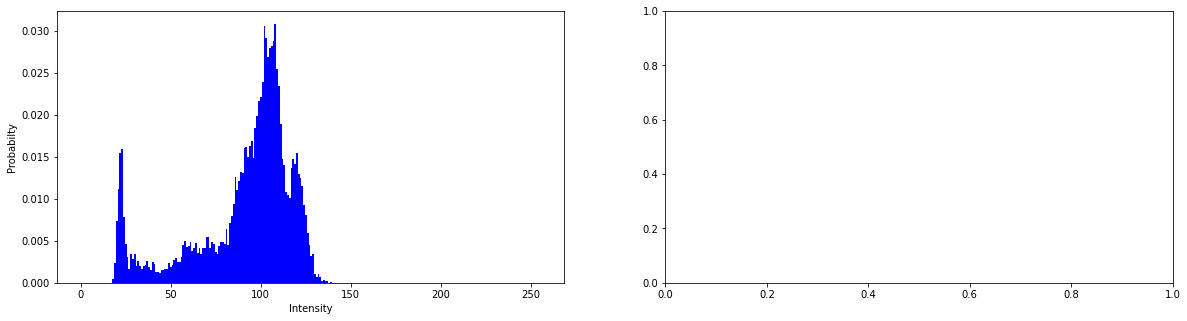

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


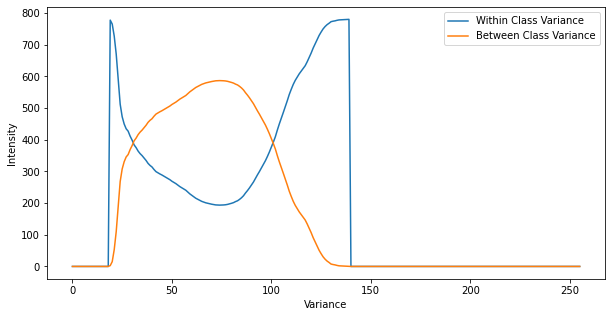

optimal threshold 74


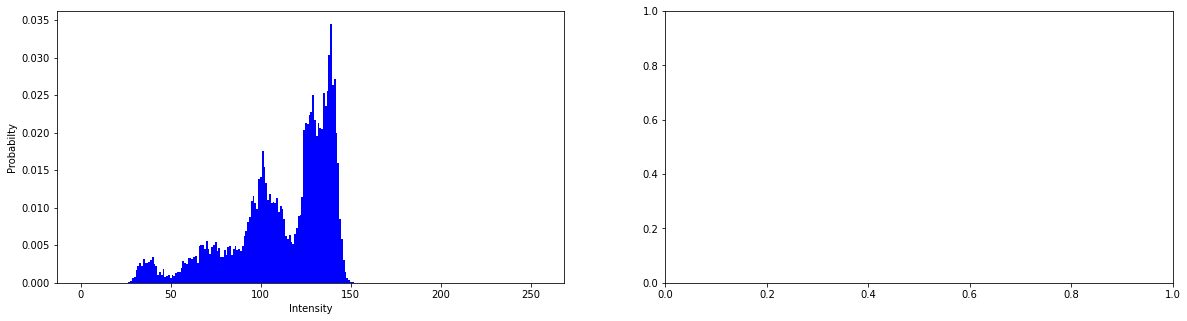

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


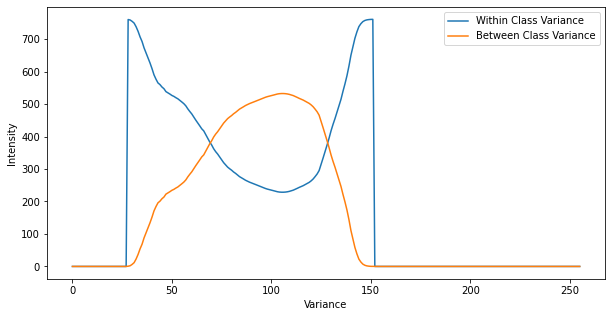

optimal threshold 106


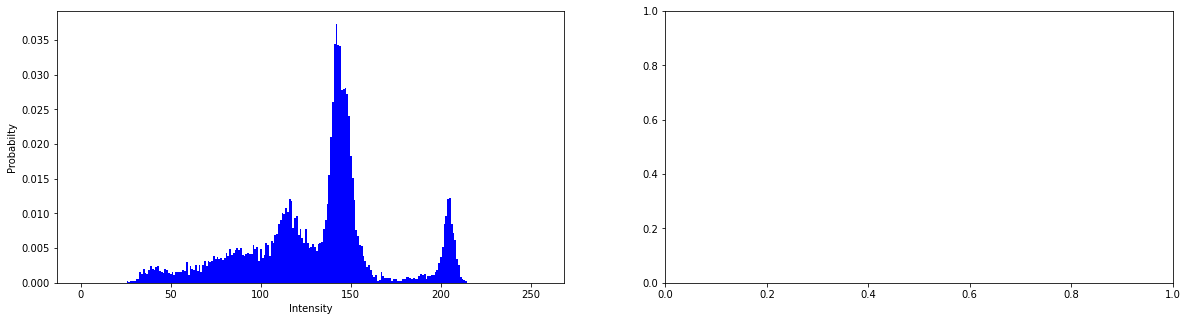

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


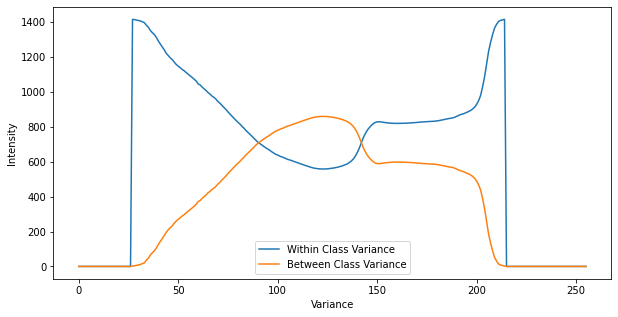

optimal threshold 123


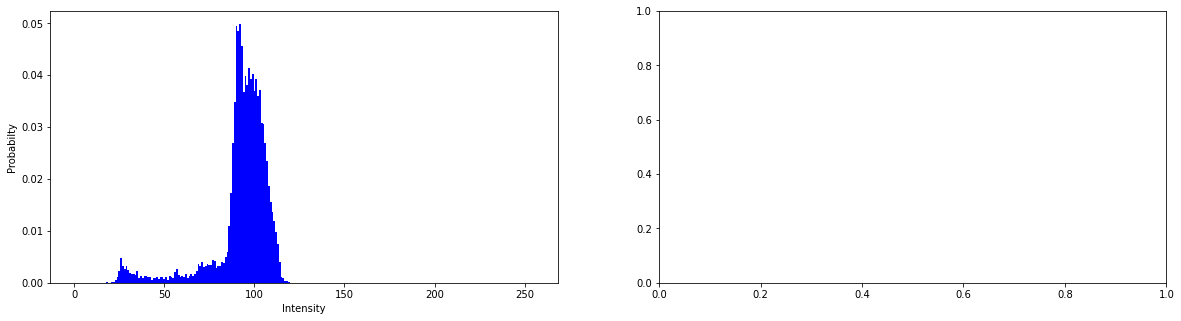

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


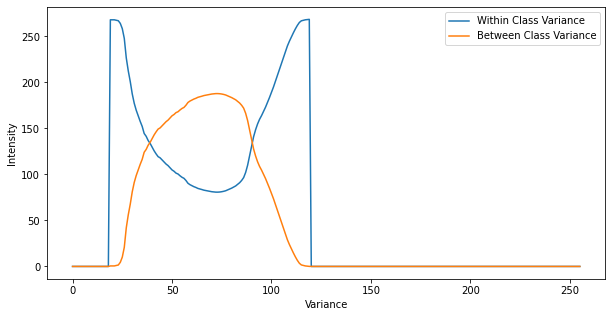

optimal threshold 73


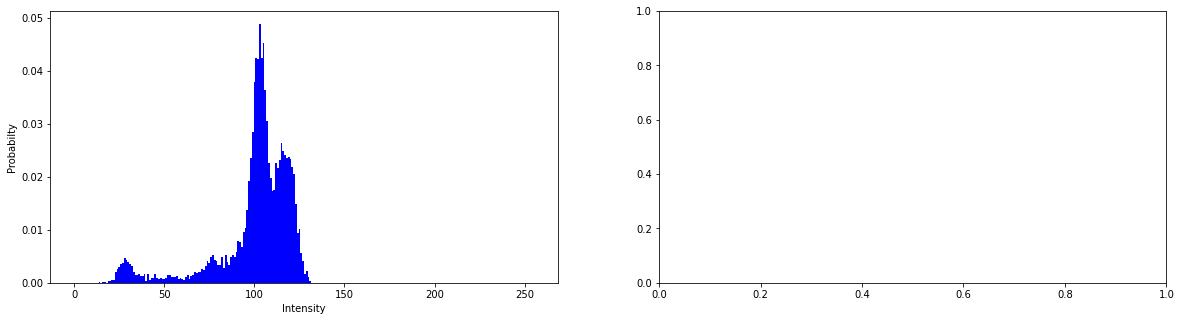

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


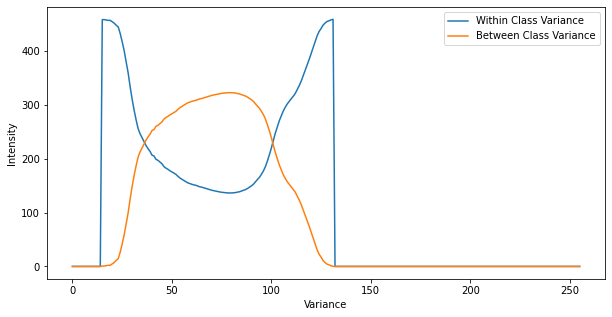

optimal threshold 79


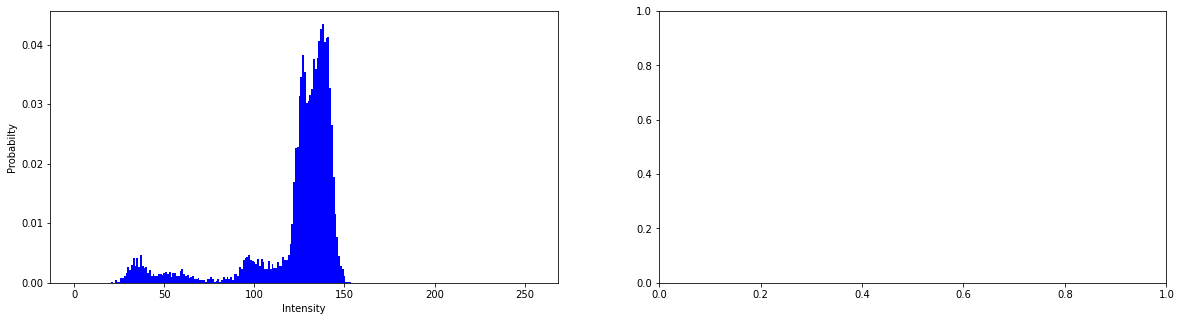

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


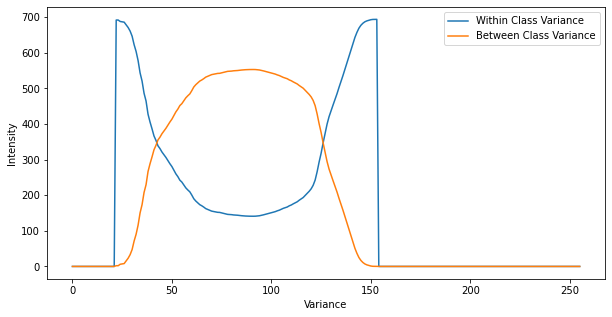

optimal threshold 90


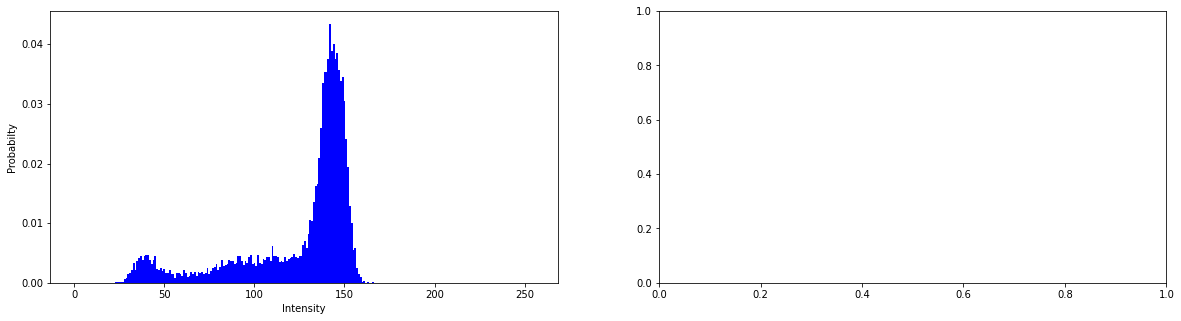

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


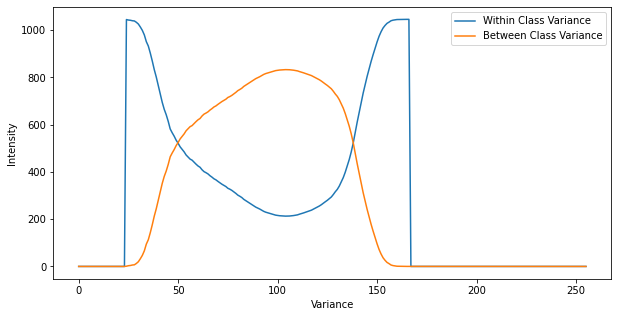

optimal threshold 104


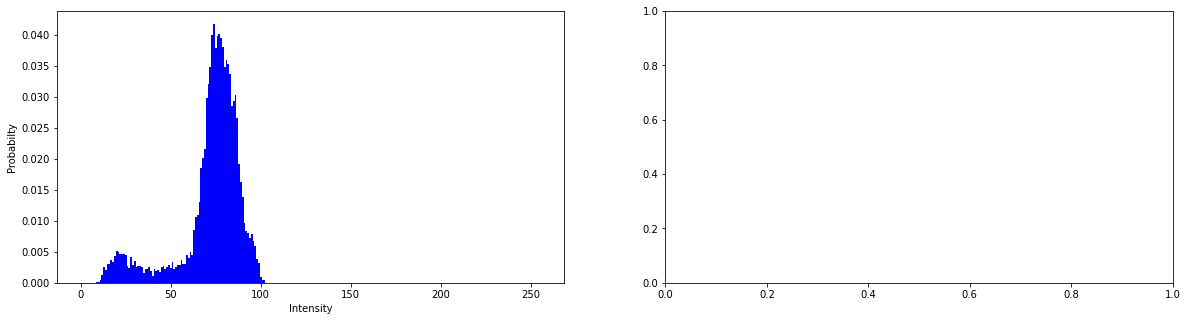

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


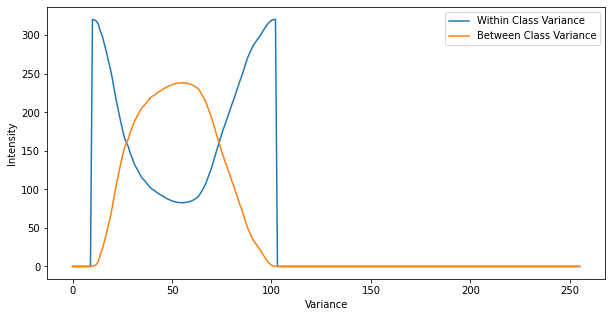

optimal threshold 55


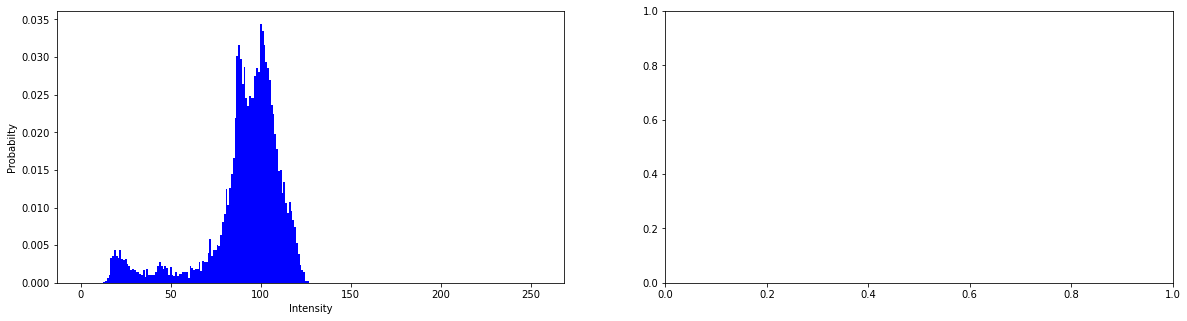

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


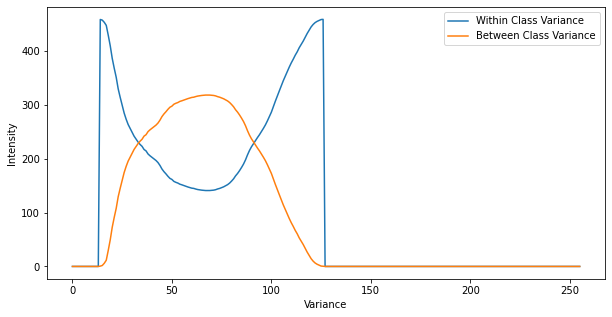

optimal threshold 68


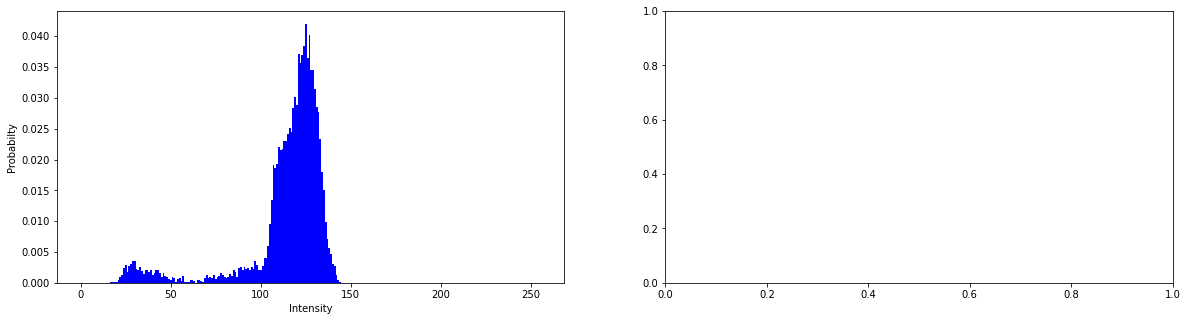

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


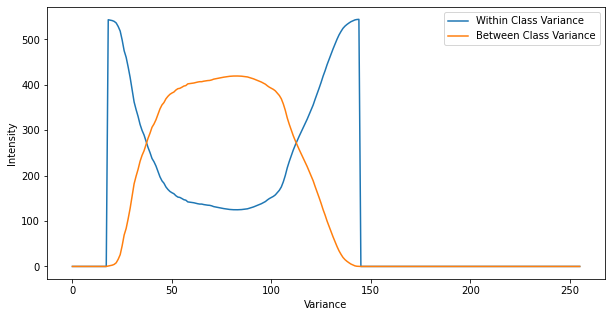

optimal threshold 82


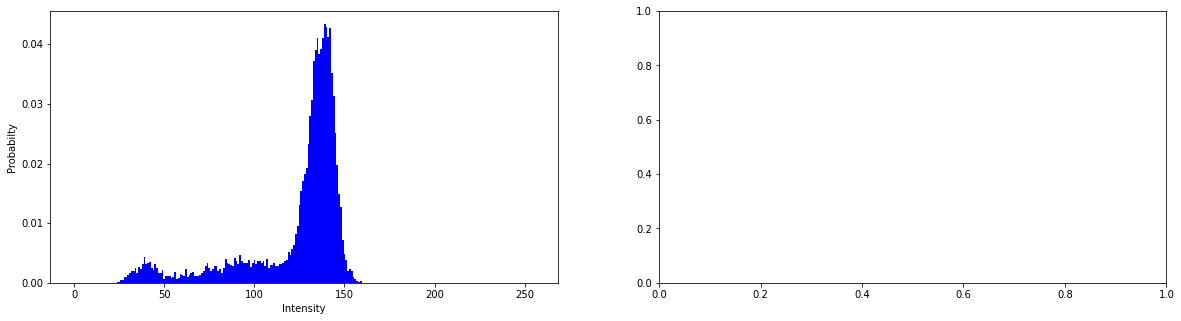

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


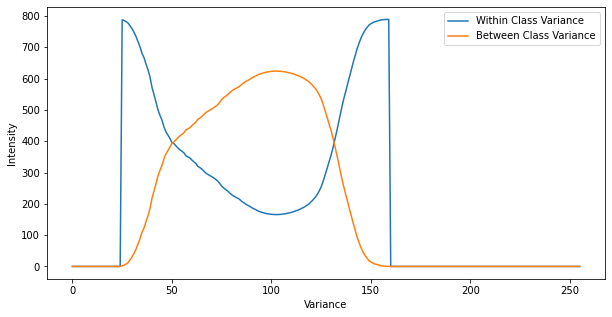

optimal threshold 102


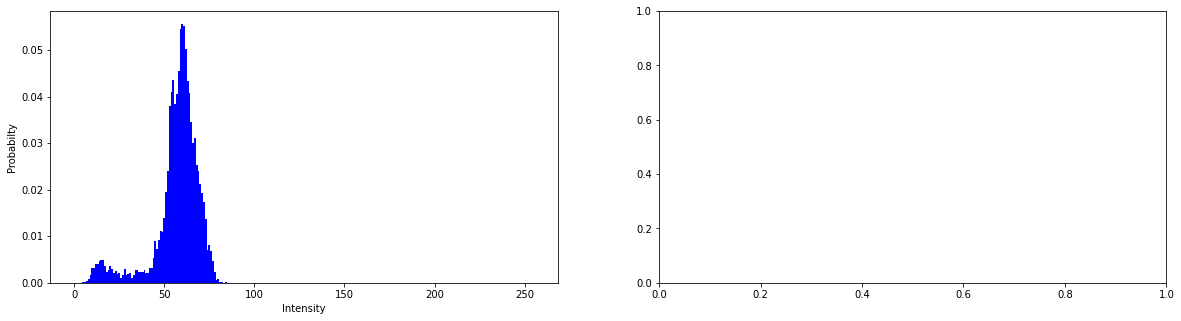

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


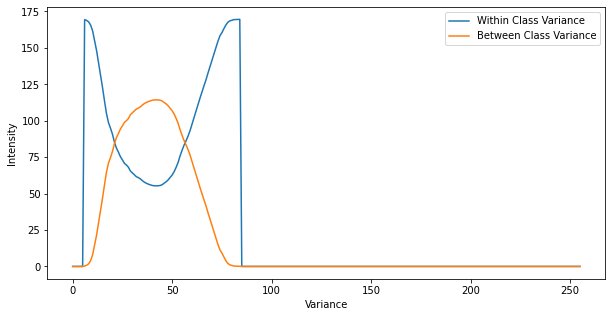

optimal threshold 42


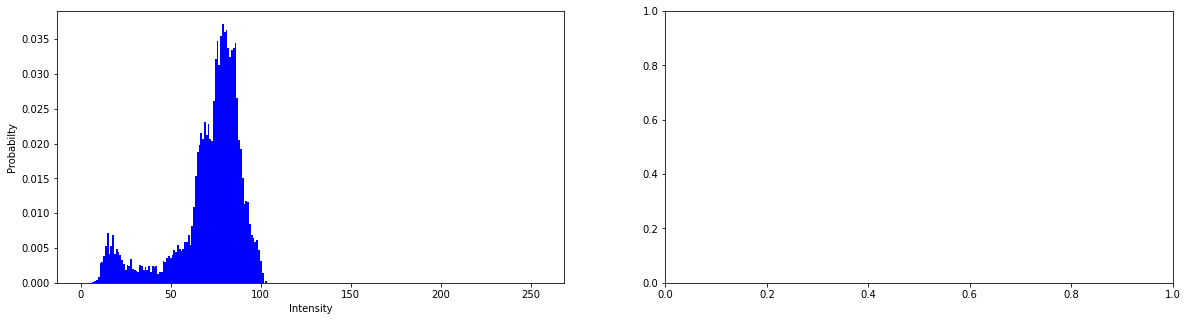

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


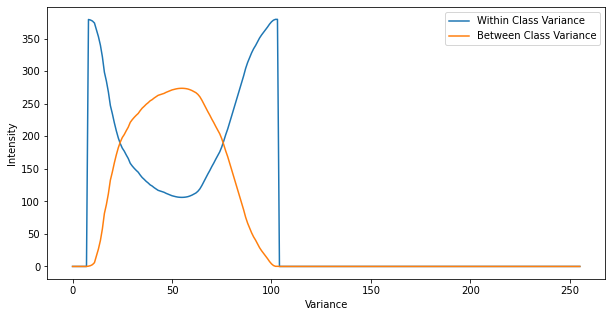

optimal threshold 55


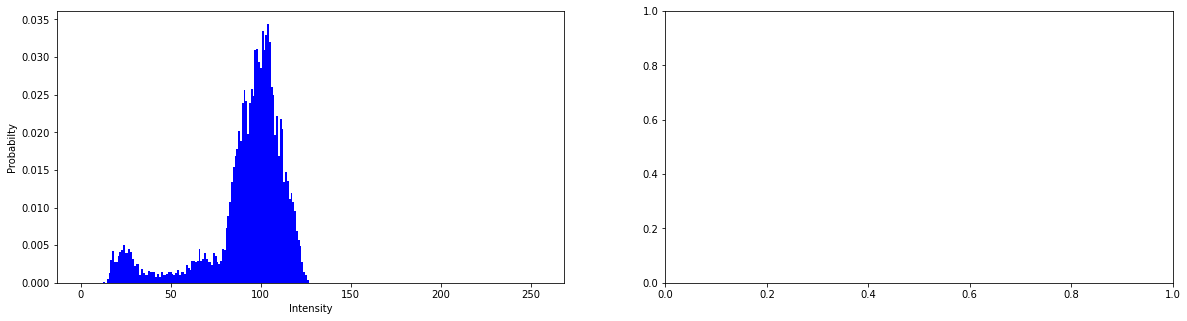

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


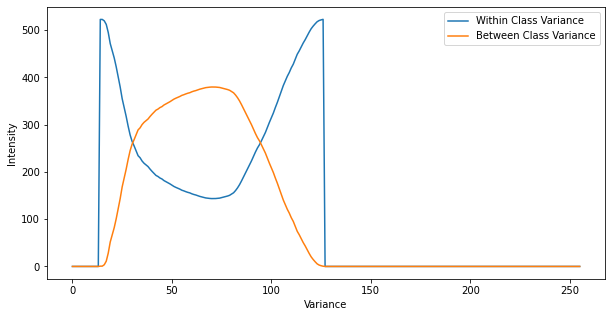

optimal threshold 71


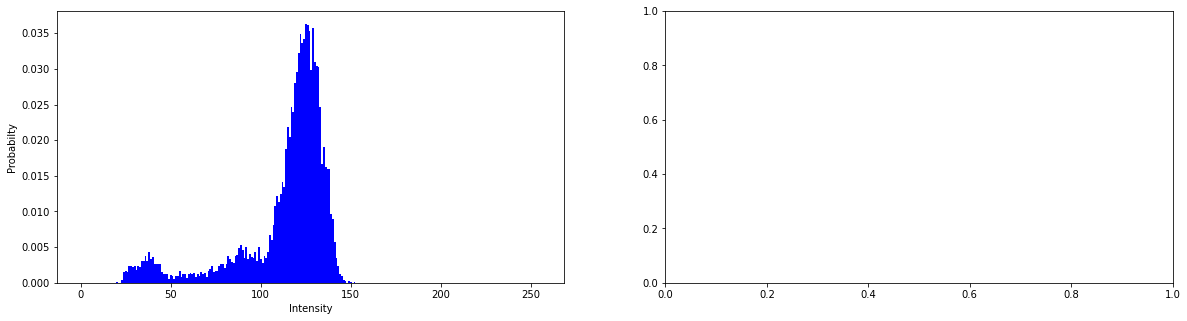

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


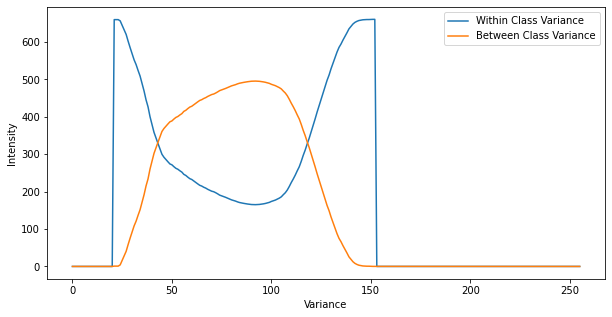

optimal threshold 92
400 400


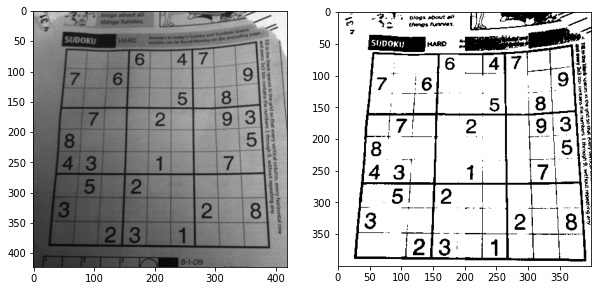

In [8]:
#Local Thresholding
def Local_Threshold(img,block_size):
    img = np.asarray(img)
    print(img.shape)
    row, col = img.shape 
    y = np.zeros((row, col))
    windowsize_r = block_size
    windowsize_c = block_size
    # Crop out the window and calculate the local threshold
    for r in range(0,img.shape[0] - windowsize_r, windowsize_r):
        for c in range(0,img.shape[1] - windowsize_c, windowsize_c):
            window = img[r:r+windowsize_r,c:c+windowsize_c]
            y[r:r+windowsize_r,c:c+windowsize_c]=Otsu_Threshold(window)
    x_lim=(col//block_size)*block_size
    y_lim=(row//block_size)*block_size
    print(x_lim,y_lim)
    return y[0:x_lim,0:y_lim]

image = Image.open('sudoku-original.jpg').convert("L")
res=Local_Threshold(image,100)
f, axarr = plt.subplots(1,2,figsize=(10,10))
axarr[0].imshow(image,cmap="gray")
axarr[1].imshow(res,cmap="gray")